Repo Path: /home/benet/tfg
Experiment Path: /home/benet/tfg/experiments/ddpm
Loading pipeline from /home/benet/tfg/results/pipelines/ddpm


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

Generating images...


  0%|          | 0/1000 [00:00<?, ?it/s]

TypeError: 'Axes' object is not subscriptable

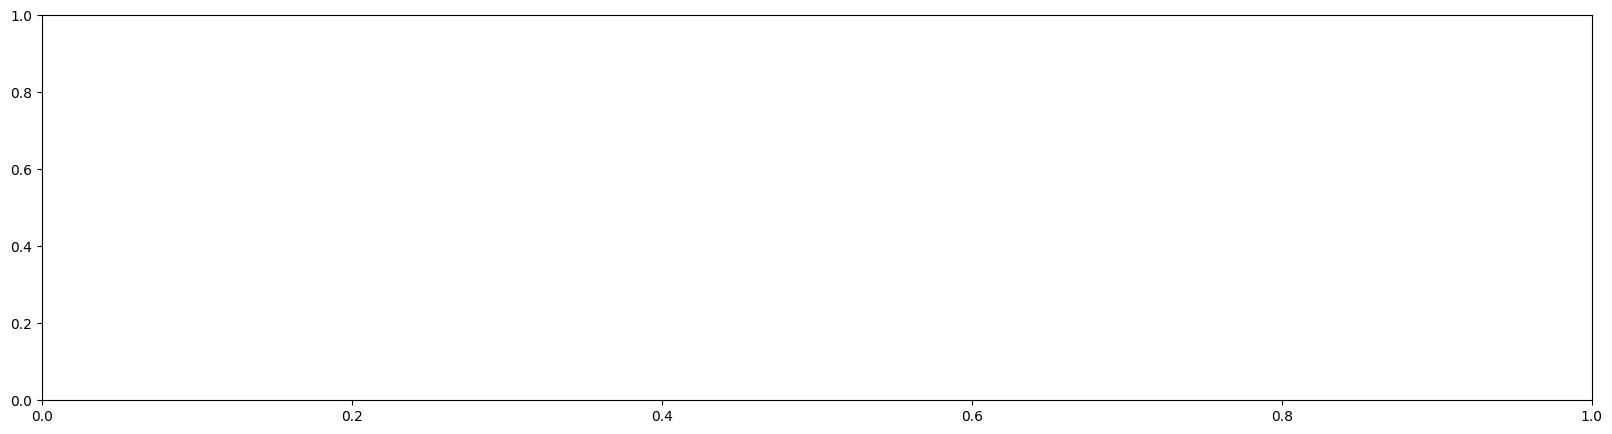

In [ ]:
import os
from pathlib import Path
import torch
from diffusers import DDPMPipeline
import numpy as np
import matplotlib.pyplot as plt

# Add repo path to the system path
repo_path = Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path):
    repo_path = repo_path.parent

exp_path = Path.cwd().resolve()
print(f"Repo Path: {repo_path}")
print(f"Experiment Path: {exp_path}")

# Load config file
import yaml
config_path = exp_path / 'config_ddpm.yaml'
with open(config_path) as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

# Define the pipeline directory where model is saved
pipeline_dir = repo_path / config['saving']['local']['outputs_dir'] / config['saving']['local']['pipeline_name']

# Check if the pipeline directory exists
if not pipeline_dir.exists():
    raise FileNotFoundError(f"Pipeline directory not found at {pipeline_dir}")

# Load the model pipeline
print(f"Loading pipeline from {pipeline_dir}")
pipeline = DDPMPipeline.from_pretrained(str(pipeline_dir))
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
pipeline.to(device)

# Seed for reproducibility
generator = torch.Generator(device=device).manual_seed(17844)

# Number of images to generate
num_images = 1

# Generate images
print("Generating images...")
images = pipeline(batch_size=num_images, generator=generator, output_type="numpy").images

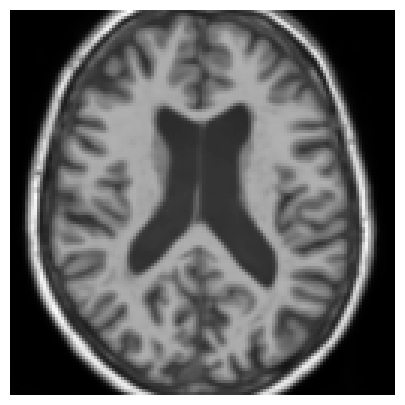

Image generation completed.


In [4]:
# Visualize generated images
fig, axs = plt.subplots(1, num_images, figsize=(20, 5))
axs = axs if num_images > 1 else [axs]  # Ensure axs is iterable
for i in range(num_images):
    axs[i].imshow(images[i].squeeze(), cmap="gray")
    axs[i].axis("off")
plt.show()

print("Image generation completed.")


Repo Path: /home/benet/tfg
Experiment Path: /home/benet/tfg/experiments/ddpm
Loading pipeline from /home/benet/tfg/results/pipelines/ddpm


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

Generating 8 images using DDIM with 50 steps...


  0%|          | 0/50 [00:00<?, ?it/s]

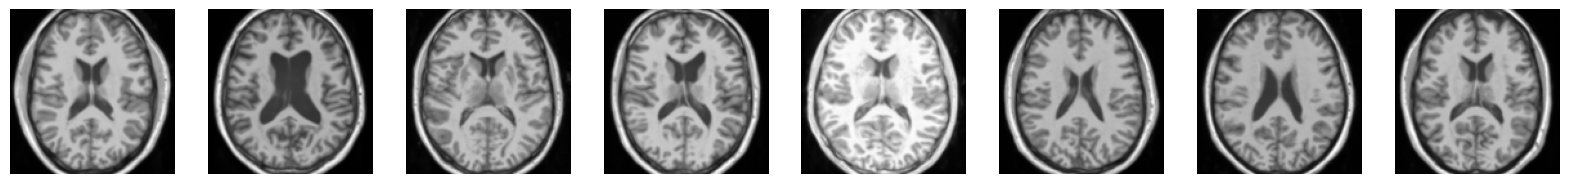

Image generation completed.


In [10]:
import os
from pathlib import Path
import torch
from diffusers import DDPMPipeline, DDIMScheduler
import numpy as np
import matplotlib.pyplot as plt

# Add repo path to the system path
repo_path = Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path):
    repo_path = repo_path.parent

exp_path = Path.cwd().resolve()
print(f"Repo Path: {repo_path}")
print(f"Experiment Path: {exp_path}")

# Load config file
import yaml
config_path = exp_path / 'config_ddpm.yaml'
with open(config_path) as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

# Define the pipeline directory where model is saved
pipeline_dir = repo_path / config['saving']['local']['outputs_dir'] / config['saving']['local']['pipeline_name']

# Check if the pipeline directory exists
if not pipeline_dir.exists():
    raise FileNotFoundError(f"Pipeline directory not found at {pipeline_dir}")

# Load the model pipeline
print(f"Loading pipeline from {pipeline_dir}")
pipeline = DDPMPipeline.from_pretrained(str(pipeline_dir))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
pipeline.to(device)

# Replace the scheduler with DDIMScheduler
ddim_scheduler = DDIMScheduler.from_pretrained(str(pipeline_dir), subfolder="scheduler")
pipeline.scheduler = ddim_scheduler

# Set number of DDIM steps
num_ddim_steps = 50
pipeline.scheduler.set_timesteps(num_ddim_steps)

# Seed for reproducibility
generator = torch.Generator(device=device).manual_seed(17844)

# Number of images to generate
num_images = 8

# Generate images with the correct number of DDIM steps
print(f"Generating {num_images} images using DDIM with {num_ddim_steps} steps...")
images = pipeline(
    batch_size=num_images,
    generator=generator,
    output_type="numpy",
    num_inference_steps=num_ddim_steps  # This makes sure the correct number of steps is used
).images

# Visualize generated images
fig, axs = plt.subplots(1, num_images, figsize=(20, 5))
axs = axs if num_images > 1 else [axs]  # Ensure axs is iterable
for i in range(num_images):
    axs[i].imshow(images[i].squeeze(), cmap="gray")
    axs[i].axis("off")
plt.show()

print("Image generation completed.")
